## Final Project for DTSA-5509


Welcome to my final project for DTSA-5509!

Before running this notebook, please ensure you have all required dependancies installed in your build. All required packages are listed above.

Note, the dataset is around (~1 GB), so download may take a while. Thanks for taking the time to grade my work!

For this project I am using an image dataset from kaggle "Rice Image Data"

I chose to look at the problem of classifying 5 different types of rice. The goal is to predict the rice type based on their images.

Rice, which is among the most widely produced grain products worldwide, has many genetic varieties which are separated from each other due to some of their features.

With these features such as texture, shape, and color that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds which can be applied in practice.

## Problem Description & Information

Rice Image Dataset: A total of 75,000 grain images, 15,000 from each of these 5 varieties (Arborio, Basmati, Ipsala, Jasmine, Karacadag), are included in the dataset.

I'll use one of the ML models that we learned in this course such as KNN Classifier, AdaBoost Classifier, Random Forest Classifier

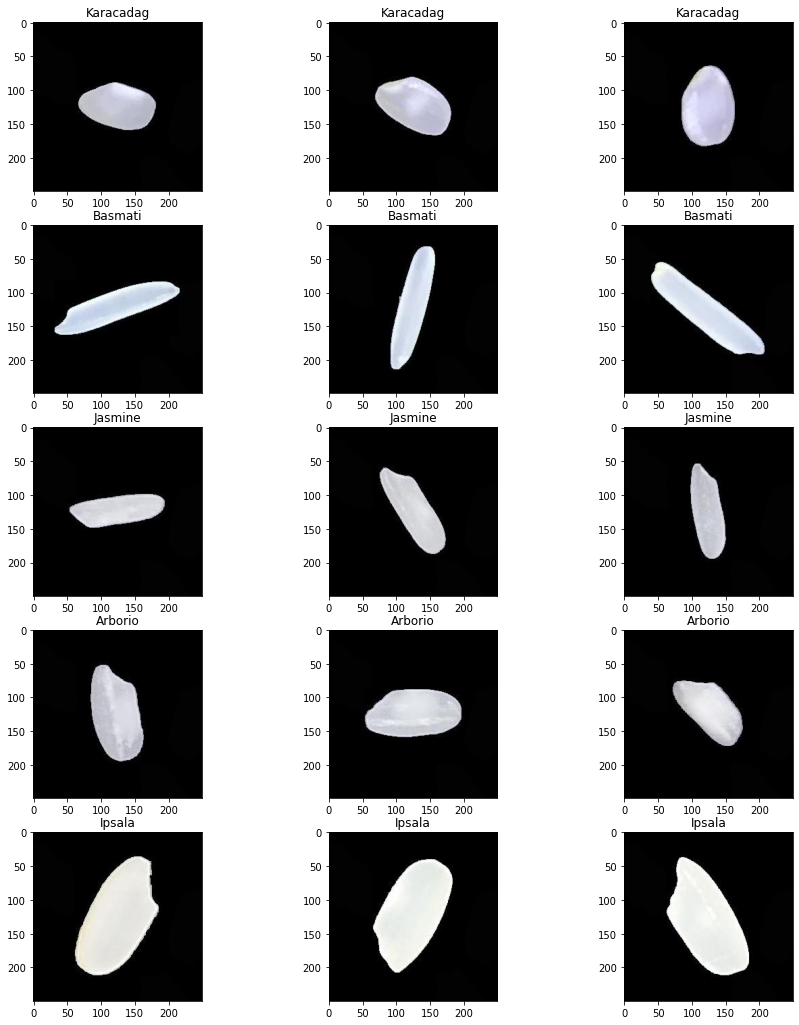

In [18]:
import cv2
import numpy as np
import pandas as pd
import sys
import os
import glob as gb
import random
import splitfolders
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pathlib
import seaborn as sns
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_score
import time

In [2]:
Data_path = '/Users/puranik/FinalProject/Rice_Image_Dataset/'

In [8]:
splitfolders.ratio(Data_path,output='imgs',seed=123,ratio=(.7,.15,.15),group_prefix=None)

Copying files: 75000 files [01:33, 804.43 files/s] 


In [3]:
%cd '/Users/puranik/FinalProject'

/Users/puranik/FinalProject


In [20]:
path = "/Users/puranik/FinalProject/Rice_MSC_Dataset/Rice_MSC_Dataset.xlsx"
sheet_name = "Rice_MSC_Dataset"
data = pd.read_excel(path, sheet_name = sheet_name, usecols = "A:P, DC")

data.head(20)
df = data.copy()

In [25]:
df.head(20)

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    7805    437.915    209.8215     48.0221        0.9735   99.6877   
1    7503    340.757    138.3361     69.8417        0.8632   97.7400   
2    5124    314.617    141.9803     46.5784        0.9447   80.7718   
3    7990    437.085    201.4386     51.2245        0.9671  100.8622   
4    7433    342.893    140.3350     68.3927        0.8732   97.2830   
5   11648    445.527    178.4659     84.9327        0.8795  121.7813   
6    7621    450.325    219.0981     45.2301        0.9785   98.5056   
7    8582    367.338    146.6128     75.5406        0.8570  104.5320   
8    5450    320.362    139.9963     50.6910        0.9321   83.3016   
9    6781    307.023    116.2443     74.8093        0.7654   92.9184   
10   9656    451.287    206.7047     60.2333        0.9566  110.8801   
11   8460    362.862    149.4804     72.9154        0.8730  103.7864   
12   7090    401.778    190.9745     47.8482        0.9681   95.0119   
13   6208    300.124    113.9325     70.6069        0.7848   88.9060   
14   7116    411.103    197.0442     46.7342        0.9715   95.1860   
15   6276    288.886    108.0128     74.3469        0.7254   89.3916   
16   5832    282.750    108.9852     68.6358        0.7768   86.1715   
17   6628    311.431    119.7466     72.0507        0.7987   91.8642   
18   5251    327.214    151.2670     45.0754        0.9546   81.7666   
19  12769    447.830    184.4764     88.6296        0.8770  127.5068   

    SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0     0.9775         7985  0.3547        4.3693     0.5114       0.4751   
1     0.9660         7767  0.6637        1.9807     0.8120       0.7065   
2     0.9721         5271  0.4760        3.0482     0.6505       0.5689   
3     0.9659         8272  0.6274        3.9325     0.5256       0.5007   
4     0.9831         7561  0.6006        2.0519     0.7944       0.6932   
5     0.9599        12135  0.5660        2.1013     0.7374       0.6824   
6     0.9718         7842  0.3398        4.8441     0.4722       0.4496   
7     0.9740         8811  0.6423        1.9408     0.7992       0.7130   
8     0.9626         5662  0.5502        2.7618     0.6673       0.5950   
9     0.9819         6906  0.7208        1.5539     0.9040       0.7993   
10    0.9748         9906  0.5692        3.4317     0.5958       0.5364   
11    0.9822         8613  0.7673        2.0501     0.8074       0.6943   
12    0.9789         7243  0.4039        3.9913     0.5519       0.4975   
13    0.9658         6428  0.7630        1.6136     0.8661       0.7803   
14    0.9679         7352  0.4445        4.2163     0.5291       0.4831   
15    0.9866         6361  0.7821        1.4528     0.9450       0.8276   
16    0.9846         5923  0.7172        1.5879     0.9167       0.7907   
17    0.9687         6842  0.7201        1.6620     0.8588       0.7672   
18    0.9771         5374  0.4392        3.3559     0.6163       0.5405   
19    0.9804        13024  0.6733        2.0814     0.8001       0.6912   

    SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4      CLASS  
0          0.0269         0.0062         0.2257         0.9863    Basmati  
1          0.0184         0.0093         0.4992         0.9888    Arborio  
2          0.0277         0.0091         0.3236         0.9865    Jasmine  
3          0.0252         0.0064         0.2507         0.9859    Basmati  
4          0.0189         0.0092         0.4806         0.9860    Arborio  
5          0.0153         0.0073         0.4656         0.9784     Ipsala  
6          0.0287         0.0059         0.2021         0.9792    Basmati  
7          0.0171         0.0088         0.5083         0.9866    Arborio  
8          0.0257         0.0093         0.3541         0.9778    Jasmine  
9          0.0171         0.0110         0.6389         0.9928  Karacadag  
10         0.0214         0.0062         0.2877         0.9875    Jasmine  
11  

In [26]:
df.describe()

AREA     PERIMETER    MAJOR_AXIS    MINOR_AXIS  ECCENTRICITY  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean    8379.197507    378.169453    161.805540     66.829335      0.886077   
std     3119.209274     70.597008     36.461005     16.689269      0.071906   
min     3929.000000    261.040000     96.968300     34.673000      0.627700   
25%     6259.000000    316.431500    132.623500     49.650200      0.846100   
50%     7345.000000    351.261000    149.343950     69.183900      0.885600   
75%     8901.000000    444.986000    197.462025     75.814125      0.950800   
max    21019.000000    593.698000    255.647200    113.441100      0.986800   

            EQDIASQ      SOLIDITY   CONVEX_AREA        EXTENT  ASPECT_RATIO  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean     101.731251      0.975896   8584.862320      0.633226      2.597063   
std       17.874070      0.007966   3189.298025      0.123795      0.968982   
min       70.728800      0.877500   4032.000000      0.278800      1.284500   
25%       89.270400      0.970900   6385.000000      0.561000      1.876100   
50%       96.705500      0.976400   7532.000000      0.655800      2.153200   
75%      106.457100      0.982200   9153.000000      0.727800      3.228700   
max      163.591600      0.992100  21633.000000      0.901700      6.179500   

          ROUNDNESS   COMPACTNESS  SHAPEFACTOR_1  SHAPEFACTOR_2  \
count  75000.000000  75000.000000   75000.000000   75000.000000   
mean       0.732505      0.646079       0.020619       0.008407   
std        0.138637      0.110787       0.005287       0.001903   
min        0.392500      0.400600       0.011300       0.005100   
25%        0.620600      0.551100       0.017000       0.006600   
50%        0.775400      0.677100       0.018600       0.008700   
75%        0.834500      0.725300       0.026200       0.009700   
max        0.980000      0.879900       0.036900       0.013500   

       SHAPEFACTOR_3  SHAPEFACTOR_4  
count   75000.000000   75000.000000  
mean        0.429692       0.985509  
std         0.141146       0.007280  
min         0.160500       0.896200  
25%         0.303700       0.981600  
50%         0.458500       0.986400  
75%         0.526100       0.990700  
max         0.774300       0.999000

In [27]:
df.shape

(75000, 17)

In [28]:
df.describe(include=[object])

CLASS
count    75000
unique       5
top     Ipsala
freq     15000

In [29]:
print(set(df["CLASS"].values))

{'Basmati', 'Ipsala', 'Arborio', 'Karacadag', 'Jasmine'}


In [30]:
def check_nb_instances(data):
    print(data['CLASS'].value_counts())
    _= sns.countplot(x='CLASS', data = data)

Ipsala       15000
Basmati      15000
Karacadag    15000
Arborio      15000
Jasmine      15000
Name: CLASS, dtype: int64


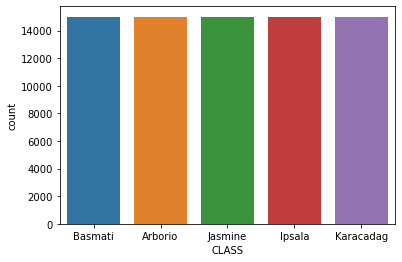

In [31]:
check_nb_instances(df)

In [13]:
print(data.info())
print(data.describe())

for col in data.columns:
    print(col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           75000 non-null  int64  
 1   PERIMETER      75000 non-null  float64
 2   MAJOR_AXIS     75000 non-null  float64
 3   MINOR_AXIS     75000 non-null  float64
 4   ECCENTRICITY   75000 non-null  float64
 5   EQDIASQ        75000 non-null  float64
 6   SOLIDITY       75000 non-null  float64
 7   CONVEX_AREA    75000 non-null  int64  
 8   EXTENT         75000 non-null  float64
 9   ASPECT_RATIO   75000 non-null  float64
 10  ROUNDNESS      75000 non-null  float64
 11  COMPACTNESS    75000 non-null  float64
 12  SHAPEFACTOR_1  75000 non-null  float64
 13  SHAPEFACTOR_2  75000 non-null  float64
 14  SHAPEFACTOR_3  75000 non-null  float64
 15  SHAPEFACTOR_4  75000 non-null  float64
 16  CLASS          75000 non-null  object 
dtypes: float64(14), int64(2), object(1)
memory usage: 

## Correlation Matrix

There are many highly covariant features. Some seem to be direct functions of others such:
as area being calculated from the major and minor axis lengths, eccentricity also being a function of major and minor axis length, etc. 
The dataset is highly multicollinear

<AxesSubplot:>

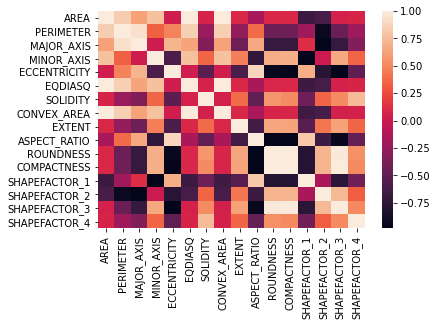

In [14]:
corrMatrix = data.corr()
sn.heatmap(corrMatrix)

## Data Preprocessing

In [10]:
Label_list=[]
for folder in os.listdir(Data_path):
    if(os.path.isdir(Data_path+r'/'+folder)):
        file = os.listdir(Data_path+r'/'+folder)
        Label_list.append(folder)
        print(f'For Data , found {len(file)} in folder {folder}')


For Data , found 15000 in folder Karacadag
For Data , found 15000 in folder Ipsala
For Data , found 15000 in folder Arborio
For Data , found 15000 in folder Basmati
For Data , found 15000 in folder Jasmine


In [21]:
Label_encode={'Karacadag':1 ,'Basmati':2,'Jasmine':3,'Arborio':4,'Ipsala':5}
def get_code(e):
    for x, y in Label_encode.items():
        if e == y:
            return x 

In [22]:
size = []
Data=[]
for folder in  os.listdir(Data_path) : 
    if(os.path.isdir(Data_path+r'/'+folder)):
        print(folder,"... ", end =" ")
        files = gb.glob(pathname= str( Data_path + folder + '/*.jpg'))
        for file in files: 
            image = plt.imread(file)
            size.append(image.shape)
            Data.append(folder)
print('')            
print(pd.Series(size).value_counts())
size.clear() 

Karacadag ...  Ipsala ...  Arborio ...  Basmati ...  Jasmine ...  
(250, 250, 3)    75000
dtype: int64


In [23]:
unique_labels = list(pd.Series(Data))
values = [len([x for x in Data if x==label]) for label in unique_labels]

In [32]:
# plot the classes
fig = go.Figure(data=[go.Pie(labels=unique_labels, values=values, 
                             rotation=-120, hole=.4, 
                             textinfo='label+percent')])
fig.update_layout(showlegend=False)
fig.show()

In [41]:
df.describe(include=[np.number])

AREA     PERIMETER    MAJOR_AXIS    MINOR_AXIS  ECCENTRICITY  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean    8379.197507    378.169453    161.805540     66.829335      0.886077   
std     3119.209274     70.597008     36.461005     16.689269      0.071906   
min     3929.000000    261.040000     96.968300     34.673000      0.627700   
25%     6259.000000    316.431500    132.623500     49.650200      0.846100   
50%     7345.000000    351.261000    149.343950     69.183900      0.885600   
75%     8901.000000    444.986000    197.462025     75.814125      0.950800   
max    21019.000000    593.698000    255.647200    113.441100      0.986800   

            EQDIASQ      SOLIDITY   CONVEX_AREA        EXTENT  ASPECT_RATIO  \
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000   
mean     101.731251      0.975896   8584.862320      0.633226      2.597063   
std       17.874070      0.007966   3189.298025      0.123795      0.968982   
min       70.728800      0.877500   4032.000000      0.278800      1.284500   
25%       89.270400      0.970900   6385.000000      0.561000      1.876100   
50%       96.705500      0.976400   7532.000000      0.655800      2.153200   
75%      106.457100      0.982200   9153.000000      0.727800      3.228700   
max      163.591600      0.992100  21633.000000      0.901700      6.179500   

          ROUNDNESS   COMPACTNESS  SHAPEFACTOR_1  SHAPEFACTOR_2  \
count  75000.000000  75000.000000   75000.000000   75000.000000   
mean       0.732505      0.646079       0.020619       0.008407   
std        0.138637      0.110787       0.005287       0.001903   
min        0.392500      0.400600       0.011300       0.005100   
25%        0.620600      0.551100       0.017000       0.006600   
50%        0.775400      0.677100       0.018600       0.008700   
75%        0.834500      0.725300       0.026200       0.009700   
max        0.980000      0.879900       0.036900       0.013500   

       SHAPEFACTOR_3  SHAPEFACTOR_4  
count   75000.000000   75000.000000  
mean        0.429692       0.985509  
std         0.141146       0.007280  
min         0.160500       0.896200  
25%         0.303700       0.981600  
50%         0.458500       0.986400  
75%         0.526100       0.990700  
max         0.774300       0.999000

In [42]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)

Here I will be adding Train set which has a very few missing values so I am going to drop all rows that have missing values in this step.

In [43]:
def preprocess(df_in):
    df = df_in.copy()
    df = df.dropna()

    X = df.drop('CLASS', axis=1)
    y = df['CLASS'].copy()
    return(X,y)

In [44]:
#Create test and train data
X_train, y_train = preprocess(train_set)
X_test, y_test = preprocess(test_set)

## Model: Random Forest Classifier

In [50]:

rf = RandomForestClassifier()
sizes = [0.2, 0.5, 1, 1.5, 2, 2.5, 3.5, 5]
mean_cv_score_dt2, test_score_dt2 = small_subsets(rf, sizes, X_train, y_train, X_test, y_test)


X_train  (60000, 16)
0.2 X_train_sub  (120, 16)
0.5 X_train_sub  (300, 16)
1 X_train_sub  (600, 16)
1.5 X_train_sub  (900, 16)
2 X_train_sub  (1200, 16)
2.5 X_train_sub  (1500, 16)
3.5 X_train_sub  (2100, 16)
5 X_train_sub  (3000, 16)


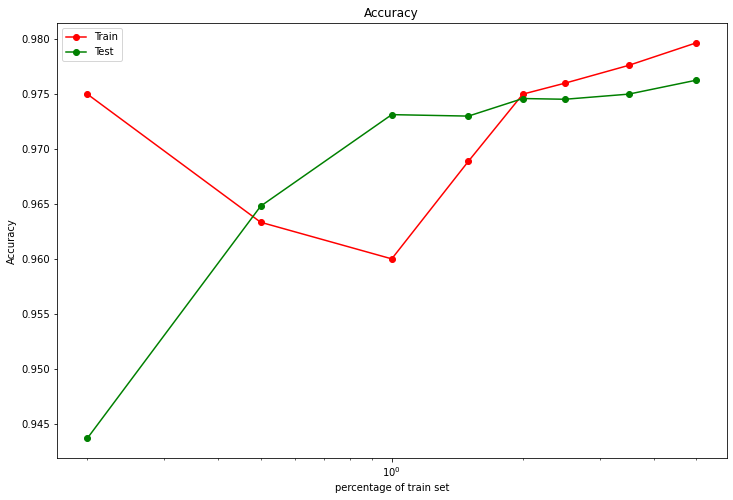

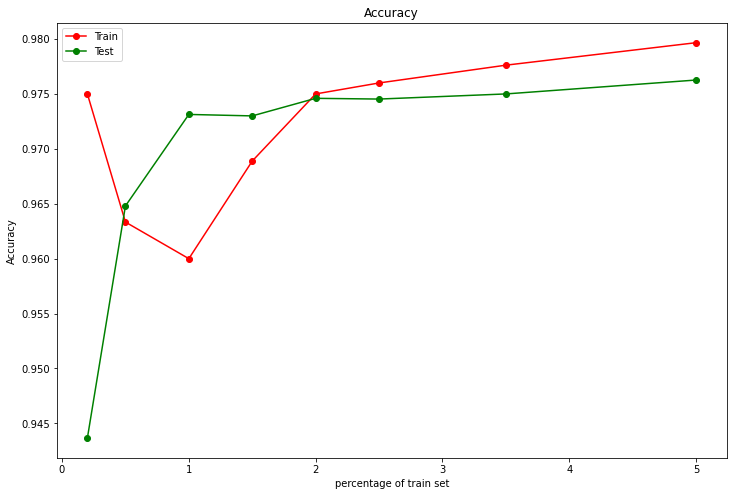

In [53]:
plot("Accuracy", "percentage of train set", sizes, mean_cv_score_dt2, test_score_dt2, log = True)
plot("Accuracy", "percentage of train set", sizes, mean_cv_score_dt2, test_score_dt2)

In [55]:
rf = RandomForestClassifier()
X_not_used, X_train_sub, y_not_used, y_train_sub = train_test_split(X_train, y_train, test_size=0.02, random_state=123, shuffle=True)
rf.fit(X_train_sub, y_train_sub)
show_result_with_model(rf, X_train_sub, X_test, y_train_sub, y_test)

Train Cross_val_score:  [0.97916667 0.95833333 0.98333333 0.975      0.975     ] 0.9741666666666667
Test Score:  0.9742


(0.9741666666666667, 0.9742)

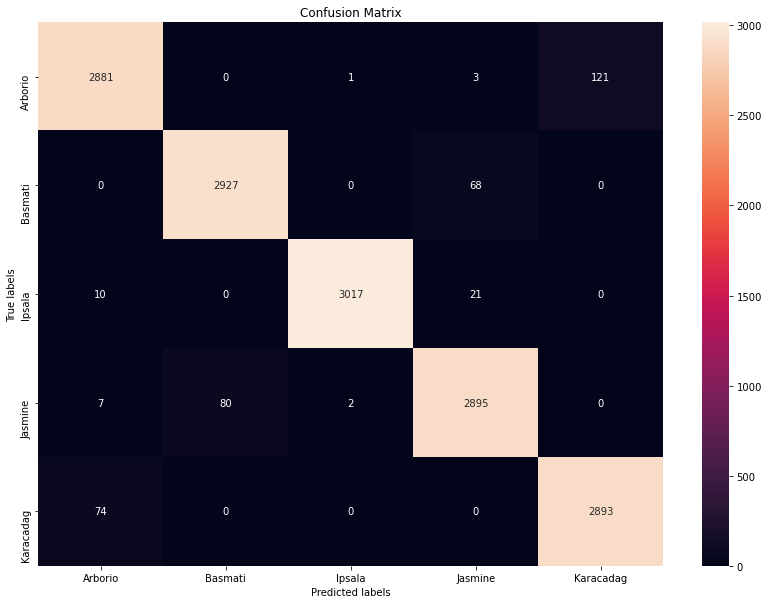

In [59]:
plotting_confusion_matrix(rf, X_test, y_test)

## Results and Analysis

The best accuracy of any random forest was 
 which occured at both 400 and 1000 trees, but the forest with only 200 trees ran almost twice as fast as the 400 trees (and almost an order of magnitude faster than 1000!) than and yielded a relative accuracy loss of only 
. For many applications that computation time savings is probably good enough to justify using the 200 tree model. Random Forest with 1000 trees yielded accuracy of: 0.9737  with a total loop time of: 4.9667


## Sample Images of Rice Grain : Image Dataset

Image dimensions: (250, 250, 3)


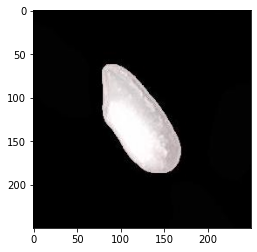

In [64]:
sample_img = cv2.imread('/Users/puranik/FinalProject/Rice_Image_Dataset/Arborio/Arborio (10).jpg')
plt.imshow(sample_img)
print(f'Image dimensions: {sample_img.shape}')

## Conclusion

The EDA performed shows that the different rice grains with totally differnent distributions of their physical characteristics. In this project, I've tried to touch down on the best practices and methodlogies taught in the class related to EDA.

In terms of the models constructed, I tried to construct Random Forest Classifier along with Confusion Matrix.
We might get to choose either the RandomForest as the best model on the feature dataset which requires even less data

Thank you for taking the time to grade my project!



## Citations
Data can be downloaded at https://www.muratkoklu.com/datasets/ under "Rice Image Dataset" as of 4/25/22. As follows are the requested citations:

1: KOKLU, M., CINAR, I. and TASPINAR, Y. S. (2021). Classification of rice varieties with deep learning methods. Computers and Electronics in Agriculture, 187, 106285.